#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/usr/local/bin:/Users/laurabryan/Library/Python/3.13/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin


In [3]:
#import all needed packages
import awkward, uproot, wget, numpy as np, matplotlib.pyplot as plt, scipy, xxhash
from scipy.optimize import curve_fit

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [4]:
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [5]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [6]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

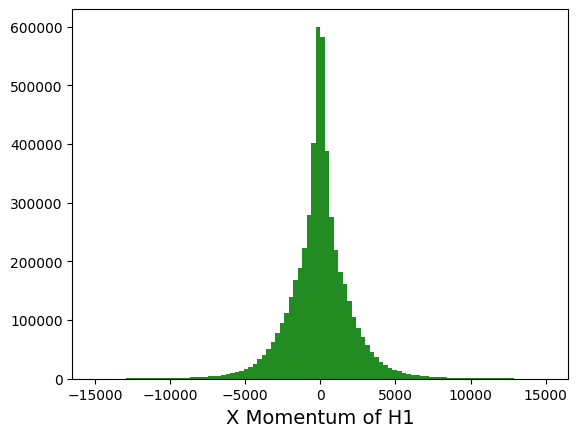

In [9]:
#lets plot something!
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000), color="forestgreen");
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

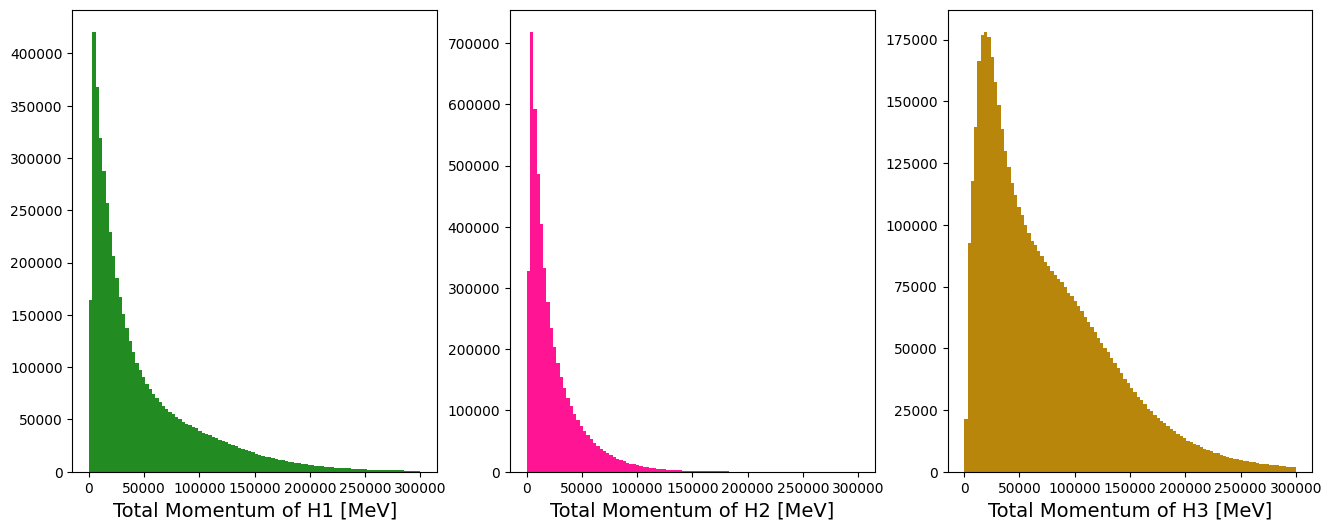

In [24]:
#access the data from the Decay tree and load the momentum of each daughter
Events=f['DecayTree']

H1_PX, H1_PY, H1_PZ = (Events[f'H1_P{i}'].array() for i in ['X', 'Y', 'Z']) #loads x, y, z momentum of H1
H2_PX, H2_PY, H2_PZ = (Events[f'H2_P{i}'].array() for i in ['X', 'Y', 'Z']) #loads x, y, z momentum of H2
H3_PX, H3_PY, H3_PZ = (Events[f'H3_P{i}'].array() for i in ['X', 'Y', 'Z']) #loads x, y, z momentum of H3

#calculate the total momentum of each daughter using Pythagoras
H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2) #calculates the total momentum of H1
H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2) #calculates the total momentum of H2
H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2) #calculates the total momentum of H3

#plot the total momentum of the daughters next to each other
plt.figure(figsize=(16,6));
plt.subplot(1,3,1);
plt.hist (H1_Ptot, bins=100, range=(0,300000), color = "forestgreen");
plt.xlabel('Total Momentum of H1 [MeV]', fontsize=14);

plt.subplot(1,3,2);
plt.hist (H2_Ptot, bins=100, range=(0,300000), color = "deeppink");
plt.xlabel('Total Momentum of H2 [MeV]', fontsize=14);

plt.subplot(1,3,3);
plt.hist (H3_Ptot, bins=100, range=(0,300000), color = "darkgoldenrod");
plt.xlabel('Total Momentum of H3 [MeV]', fontsize=14);


<font color = "navy"> From these graphs, we can check quickly whether the calculation was correctly performed and make some quick conclusions. Firstly, all the momenta are larger than 1, this should be the case, as they are the result of a square root calculation, so this suggests the data is treated correctly. Additionally, the range of values compared to the initial graph of H1_PX seems realistic as well. 

A phenomenon that can be noticed from these graphs is the difference in range of values between the different daughter particles. H3 seems to be far more likely to contain higher value momenta, while H2 is the least likely. This is probably due to the way the detector assigns names to the daughter, and is not due to a physical phenomenon.

In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

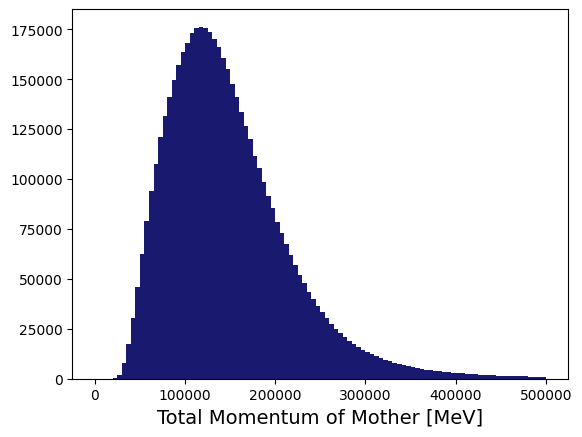

In [25]:
#In order to get the Mother particle's momentum, we need to first get its components:
M_Px = H1_PX + H2_PX + H3_PX
M_Py = H1_PY + H2_PY + H3_PY
M_Pz = H1_PZ + H2_PZ + H3_PZ

#Then we can calculate the total momentum of the mother particle using Pythagoras:
M_Ptot = np.sqrt(M_Px**2 + M_Py**2 + M_Pz**2)

#Now we can plot the total momentum of the mother particle
plt.figure();
plt.hist (M_Ptot, bins=100, range=(0,500000), color = "midnightblue");
plt.xlabel('Total Momentum of Mother [MeV]', fontsize=14);

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [13]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print (f"{branch}  :  {value}")

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [ ]:
#assuming all three are kaons, we use the kaon mass to calculate the energy of each daughter
K_mass = 493.677 #MeV

H1_E = np.sqrt(H1_Ptot**2 + K_mass**2)
H2_E = np.sqrt(H2_Ptot**2 + K_mass**2)
H3_E = np.sqrt(H3_Ptot**2 + K_mass**2)


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

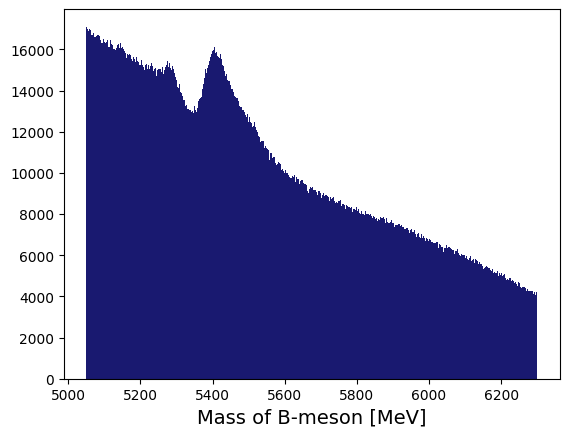

In [ ]:
#Energy and momentum is conserved so we can find the quantities for mother from her daughters
M_E = H1_E + H2_E + H3_E

#Now plot a histogram of the range of masses of the B meson.
M_Mass = np.sqrt(M_E**2 - M_Ptot**2)

plt.figure();
plt.hist (M_Mass, bins=500, color = "midnightblue");
plt.xlabel('Mass of B-meson [MeV]', fontsize=14);

<font color = "navy">  Does this match theory?
- The mass of the B-meson is 5.279 GeV, there is a little peak around this value, but there is an even larger peak at a value around 5.450 GeV. This larger peak is most likely due to the daughters being non-Kaon particles, perhaps pions or protons.

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

Text(0.5, 0, 'B Vertex Chi 2')

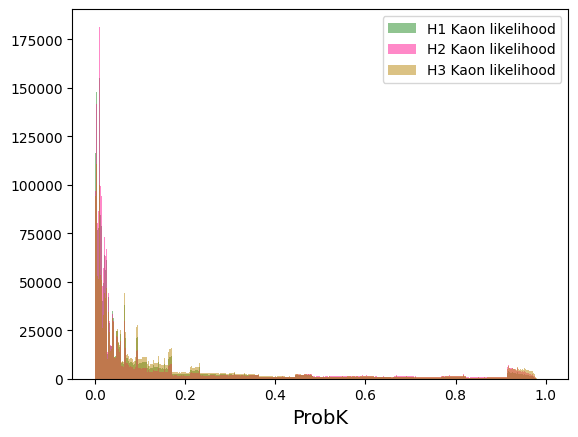

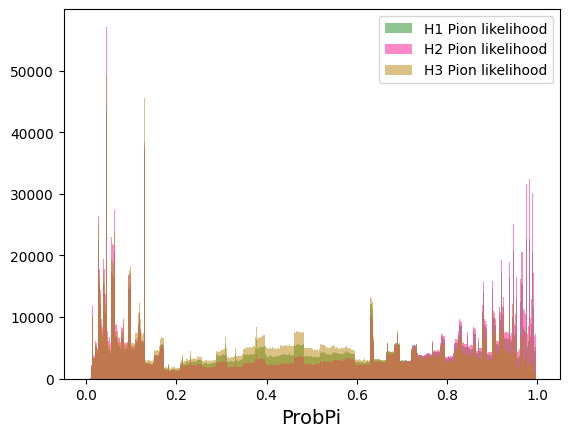

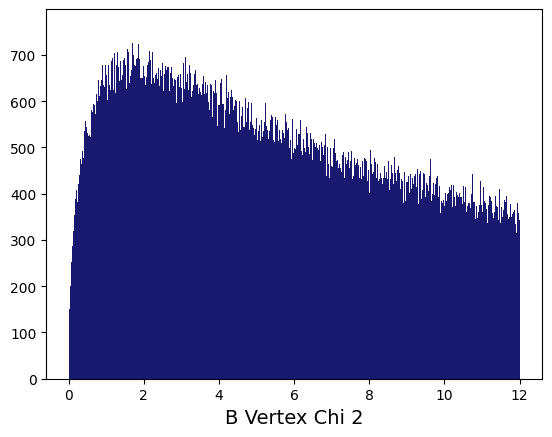

In [17]:
#plot probability of each daughter being a kaon in a histogram plot
plt.figure();
plt.hist (branches['H1_ProbK'], bins=1000, range=(0,1), color = "forestgreen", alpha=0.5, label="H1 Kaon likelihood");
plt.hist (branches['H2_ProbK'], bins=1000, range=(0,1), color = "deeppink", alpha=0.5, label='H2 Kaon likelihood');
plt.hist (branches['H3_ProbK'], bins=1000, range=(0,1), color = "darkgoldenrod", alpha=0.5, label='H3 Kaon likelihood');
plt.xlabel('ProbK', fontsize=14);
plt.legend()

#plot probability of each daughter being a pion in a histogram plot
plt.figure();
plt.hist (branches['H1_ProbPi'], bins=1000, range=(0,1), color = "forestgreen", alpha=0.5, label='H1 Pion likelihood');
plt.hist (branches['H2_ProbPi'], bins=1000, range=(0,1), color = "deeppink", alpha=0.5, label='H2 Pion likelihood');
plt.hist (branches['H3_ProbPi'], bins=1000, range=(0,1), color = "darkgoldenrod", alpha=0.5, label='H3 Pion likelihood');
plt.xlabel('ProbPi', fontsize=14);
plt.legend()

#Plot the chi squared of the vertex in a histogram plot
plt.figure();
plt.hist (branches['B_VertexChi2'], bins=10000, color = "midnightblue");
plt.xlabel('B Vertex Chi 2', fontsize=14)
#Plot any other variables from the list above you think would be handy to use in a selection...


<font color = "navy"> We can see from the plots that most daughter particles haev a large chance of not being a Kaon, but there is also a small group at large probability. For most particles, its quite certainly either a kaon, or not a kaon. For pions, there is also larger peaks at the ends, but there are more particles in the middle of the graph.

Using these plots, we can now think about making a preselection. This has some format like the below:

In [ ]:
#Now we can make a selection based on the variables we have plotted above

selection=((branches['H1_ProbK']>0.3) & 
           (branches['H2_ProbK']>0.3) & 
           (branches['H3_ProbK']>0.3) & 
           (branches['H1_isMuon']== 0) & 
           (branches['H2_isMuon'] == 0) & 
           (branches['H3_isMuon'] == 0))

<font color = "navy"> We can make various different preselections, at different levels of 'strictness', but in order to make sure we have enough data is left over to get a good estimate, we should be too strict. So, we just limit the filtering to particles that have a 0.3 or higher chance of being a Kaon, excluding the peak at the start of the ProbK graph, and we make sure our daughters are not muons.

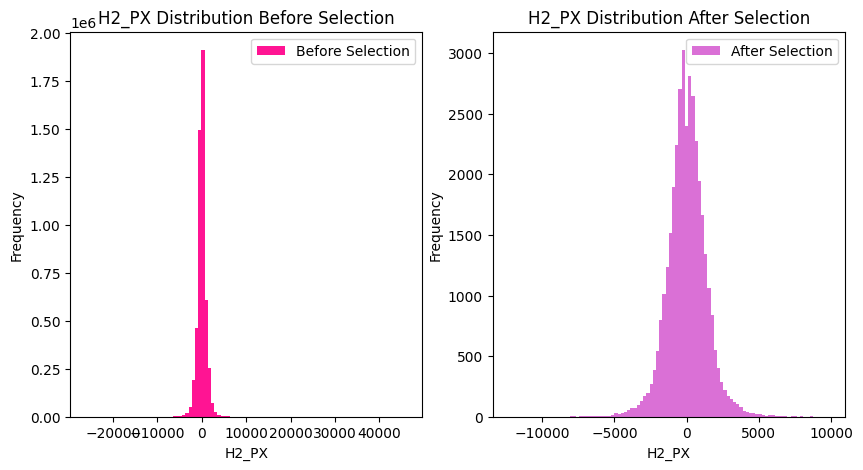

In [ ]:
#apply the above selection to the whole dataset
CutTree = branches[selection]

#To test whether the selection has worked, we can plot the H2_PX variable before and after the selection
# Histogram H2_PX before selection
plt.figure(figsize=(10, 5));
plt.subplot(1, 2, 1)
plt.hist(branches['H2_PX'], bins=100, label="Before Selection", color='deeppink')
plt.xlabel("H2_PX [MeV]")
plt.ylabel("Frequency")
plt.title("H2_PX Distribution Before Selection")
plt.legend()

# Histogram H2_PX after selection
plt.subplot(1, 2, 2)
plt.hist(CutTree['H2_PX'], bins=100, label="After Selection", color='orchid')
plt.xlabel("H2_PX [MeV]")
plt.ylabel("Frequency")
plt.title("H2_PX Distribution After Selection")
plt.legend()


<font color = "navy">At first glance it may look like there is still a large peak, but a quick look at the y-axis tells us our selection has worked! Now let's plot the B-meson mass distribution for the selection as well, plus double check whether the amount of data is still enough, were looking for anything over 25k datapoints:

5135823
35937


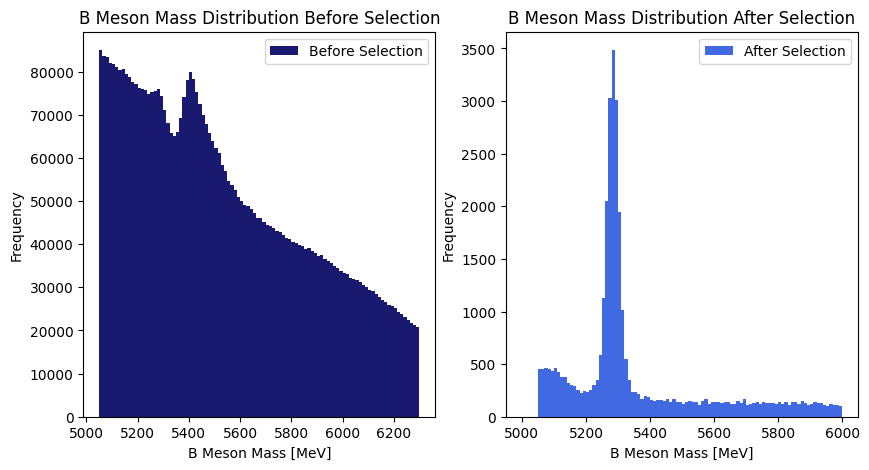

In [26]:
#recalculate the total momentum of each daughter after the selection
Cut_H1_Ptot = np.sqrt(CutTree['H1_PX']**2 + CutTree['H1_PY']**2 + CutTree['H1_PZ']**2)
Cut_H2_Ptot = np.sqrt(CutTree['H2_PX']**2 + CutTree['H2_PY']**2 + CutTree['H2_PZ']**2)
Cut_H3_Ptot = np.sqrt(CutTree['H3_PX']**2 + CutTree['H3_PY']**2 + CutTree['H3_PZ']**2)

#recalculate the total momentum of the mother particle after the selection
Cut_M_PX = CutTree['H1_PX'] + CutTree['H2_PX'] + CutTree['H3_PX']
Cut_M_PY = CutTree['H1_PY'] + CutTree['H2_PY'] + CutTree['H3_PY']
Cut_M_PZ = CutTree['H1_PZ'] + CutTree['H2_PZ'] + CutTree['H3_PZ']

Cut_M_Ptot = np.sqrt(Cut_M_PX**2 + Cut_M_PY**2 + Cut_M_PZ**2)

#recalculate the energy of each daughter after the selection
Cut_H1_E = np.sqrt(Cut_H1_Ptot**2 + K_mass**2)
Cut_H2_E = np.sqrt(Cut_H2_Ptot**2 + K_mass**2)
Cut_H3_E = np.sqrt(Cut_H3_Ptot**2 + K_mass**2)

#and calculate the energy and mass of the mother after selection
Cut_M_E = Cut_H1_E + Cut_H2_E + Cut_H3_E
Cut_M_Mass = np.sqrt(Cut_M_E**2 - Cut_M_Ptot**2)

#Now lets plot the mass of the B meson before and after the selection
#Histogram B meson mass before selection
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(M_Mass, bins=100, label="Before Selection", color='midnightblue')
plt.xlabel("B Meson Mass [MeV]")
plt.ylabel("Frequency")
plt.title("B Meson Mass Distribution Before Selection")
plt.legend()

#Histogram B meson mass after selection
plt.subplot(1, 2, 2)
plt.hist(Cut_M_Mass, bins=100, range=(5000, 6000), label="After Selection", color='royalblue')
plt.xlabel("B Meson Mass [MeV]")
plt.ylabel("Frequency")
plt.title("B Meson Mass Distribution After Selection")
plt.legend()

print(len(M_Mass)) #check the number of events before selection
print(len(Cut_M_Mass)) #check the number of events after selection
#What do you notice about your histogram now?

<font color = "navy"> Looking at the length of the cut dataset, it seems the cut was not too strict. 
We can compare the B-meson peaks like this, but in order to see the exact location and size comparison, we can overlay the peaks in one plot:

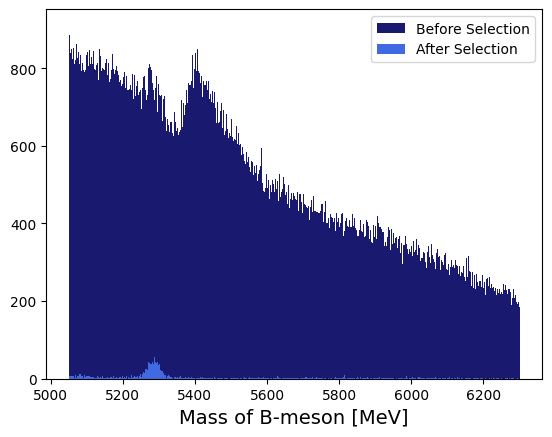

In [27]:
plt.figure();
plt.hist(M_Mass, bins=10000, color = "midnightblue");
plt.hist(Cut_M_Mass, bins=10000, color = "royalblue");
plt.xlabel('Mass of B-meson [MeV]', fontsize=14);
plt.legend(["Before Selection", "After Selection"])

<font color = 'navy'> Now we can indeed see that that larger peak at 5400 MeV must have been due to non-kaon daughter particles, as that peak is completely filtered out by the selection. The leftover peak is at the location we expect it to be ~5279 MeV.

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

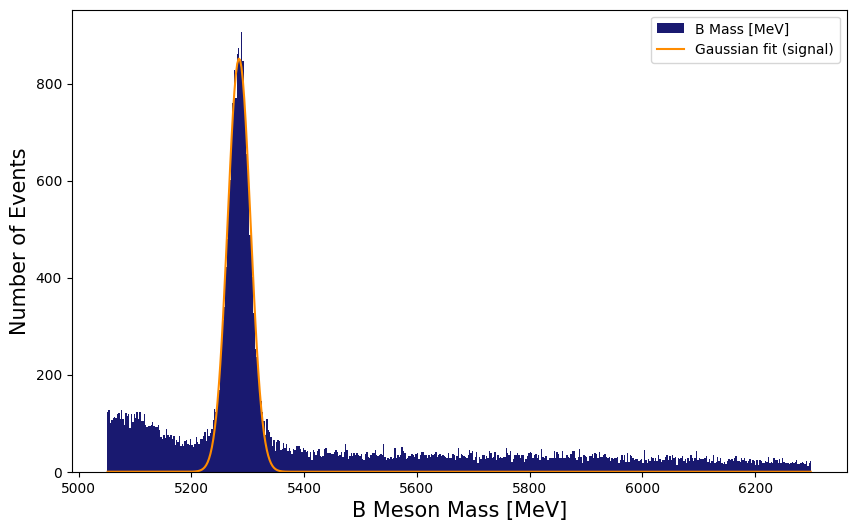

In [47]:
fig, ax = plt.subplots(figsize=(10, 6)) # make a figure and axis

# we make a plot (ax.hist) and then we extract the bin height and it's edges from the plot
bin_height, bin_edge, _= ax.hist(Cut_M_Mass, bins=500, range=(min(Cut_M_Mass), max(Cut_M_Mass)), label = "B Mass [MeV]", color="midnightblue")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

#Create a Gauss function for fitting
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

p0 = [np.max(bin_height), np.mean(Cut_M_Mass), np.std(Cut_M_Mass)] #initial parameters, A, mu and sigma
popt, pcov = curve_fit(gauss, bin_centers, bin_height, p0=p0) #fitting the curve

y_gauss = gauss(bin_centers, *popt) #creating the y values for the fit

# Now do some overlaying in the plotting environment
plt.plot(bin_centers, y_gauss, label='Gaussian fit (signal)', color ='darkorange');
ax.set_xlabel("B Meson Mass [MeV]", fontsize=15)
ax.set_ylabel("Number of Events", fontsize=15)
ax.legend()
plt.legend()
plt.show()

In [48]:
# Explore optimisedParameters (popt) - what does it contain? 
print("Optimized Parameters:")
print(f"A (Amplitude) = {popt[0]}")
print(f"μ (Mean) = {popt[1]}")
print(f"σ (Standard Deviation) = {popt[2]}")

Optimized Parameters:
A (Amplitude) = 852.0510647730835
μ (Mean) = 5284.517541161705
σ (Standard Deviation) = 20.29341997738118


<font color = "navy"> Now let's model the background using an exponential fit:

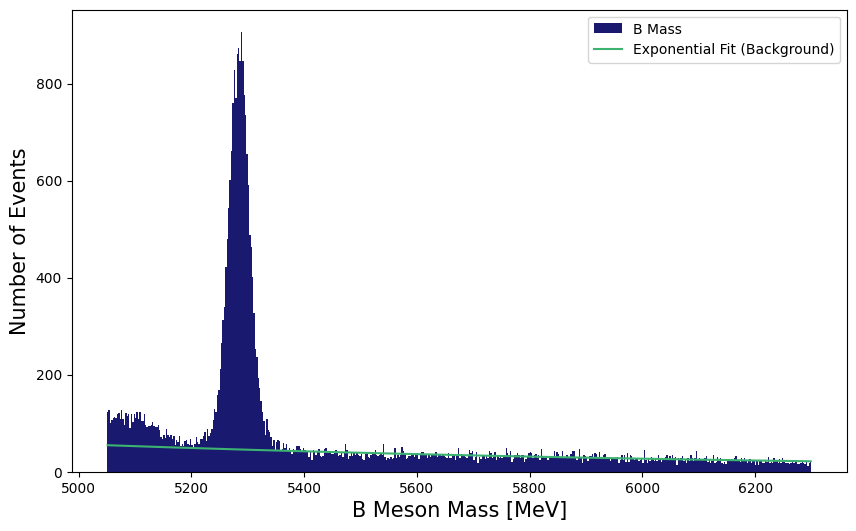

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))# make a figure and axis

# we make a plot (ax.hist) and then we extract the bin height and it's edges from the plot
bin_height, bin_edge, _ = ax.hist(Cut_M_Mass, bins=500, range=(np.min(Cut_M_Mass), np.max(Cut_M_Mass)), label="B Mass", color="midnightblue")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

# Define Exponential (background)
def expo(x, B, decay_const, x0):
    return B * np.exp(-decay_const * (x-x0))

#define a mask to only use the tail (right side of the peak) for exponential fitting
right_tail_mask = bin_centers > 5350
x_tail = bin_centers[right_tail_mask]
y_tail = bin_height[right_tail_mask]
#When trying to fit an exponential, the result was always a flat line, unless the signal peak was excluded from the fit. 
#This is because the peak is much higher than the background, and the exponential function is not able to fit the peak.
#Therefore, we exclude the peak from the fit by only using the data to the right of it, assuming the background before the peak will follow a similar trend as the background after.

#Initial guesses for Exponential
p0_expo = [np.max(y_tail), 0.001, 0]  # B, lambda, x0 

#Fit only using the right-side tail
popt_expo, pcov_expo = curve_fit(expo, x_tail, y_tail, p0=p0_expo) 

B_fit, decay_fit, x0_fit = popt_expo 
y_expo = expo(bin_centers, B_fit, decay_fit, x0_fit)

#now plot the data and the fit
plt.plot(bin_centers, y_expo, label="Exponential Fit (Background)", color="mediumseagreen")
ax.set_xlabel("B Meson Mass [MeV]", fontsize=15)
ax.set_ylabel("Number of Events", fontsize=15)
plt.legend()
plt.show()

/var/folders/yt/h1dq9sz93x91nnzf7tr_jnmh0000gn/T/ipykernel_51669/139939057.py:9: RuntimeWarning: overflow encountered in exp
  return B * np.exp(-decay_const * (x-x0))


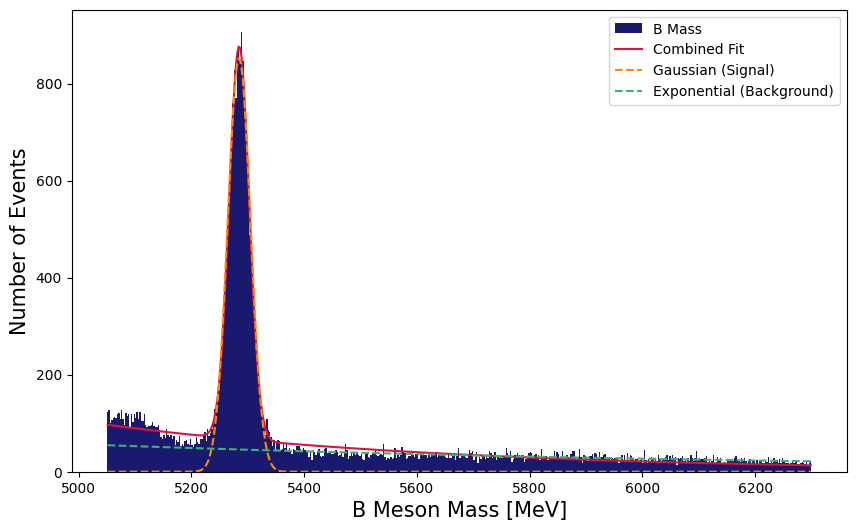

In [50]:
#Now lets combine the background and signal fits
fig, ax = plt.subplots(figsize=(10, 6)) # make a figure and axis

# we make a plot (ax.hist) and then we extract the bin height and it's edges from the plot
bin_height, bin_edge, _ = ax.hist(Cut_M_Mass, bins=500, range=(np.min(Cut_M_Mass), np.max(Cut_M_Mass)), label="B Mass", color="midnightblue")
bin_centers = (bin_edge[:-1] + bin_edge[1:]) / 2

# Combined model: Gaussian + Exponential
def combined_model(x, A, mu, sigma, B, decay_const, x0):
    return gauss(x, A, mu, sigma) + expo(x, B, decay_const, x0)

#Initial guesses
p0 = [np.max(bin_height), np.mean(Cut_M_Mass), np.std(Cut_M_Mass), np.max(bin_height) / 10, 0.001, 5279]

#Fit combined model to data
popt_comb, pcov_comb = curve_fit(combined_model, bin_centers, bin_height, p0=p0)

#Extract fitted parameters
A_fit, mu_fit, sigma_fit, B_fit, decay_fit, x0_fit = popt_comb

#Get the fitted curves
y_fit = combined_model(bin_centers, *popt_comb)

#Plot data and fits
plt.plot(bin_centers, y_fit, label="Combined Fit", color="crimson")
plt.plot(bin_centers, y_gauss, label="Gaussian (Signal)", linestyle="--", color="darkorange")
plt.plot(bin_centers, y_expo, label="Exponential (Background)", linestyle="--", color="mediumseagreen")
ax.set_xlabel("B Meson Mass [MeV]", fontsize=15)
ax.set_ylabel("Number of Events", fontsize=15)
plt.legend()
plt.show()



Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [51]:
#yields
N_signal = A_fit * sigma_fit * np.sqrt(2 * np.pi) #area under gauss curve
#Exponential area (background) is B/decay_const, but we need to account for the fact that we only used the right tail
#We can estimate the area of the exponential by extrapolating the fit to the left side of the peak
#We can then calculate the area under the curve by integrating the exponential function
x_min = np.min(bin_centers)
x_max = np.max(bin_centers)
N_background = (B_fit / decay_fit) * (np.exp(-decay_fit * (x_min - x0_fit)) - np.exp(-decay_fit * (x_max - x0_fit))) #area under expo curve

param_errors = np.sqrt(np.diag(pcov_comb)) #np.diag is the variances of covariance matrix, sqrt gives standard deviationie uncertainty
A_err, mu_err, sigma_err, B_err, decay_const_err, x0_err = param_errors #extract the errors
N_signal_err = N_signal * np.sqrt((A_err / A_fit)**2 + (sigma_err / sigma_fit)**2) #error propagation (signal)
N_background_err = N_background * np.sqrt((B_err / B_fit)**2 + (decay_const_err / decay_fit)**2) #error propagation (background)

print(f"Signal Yield: {N_signal:.2f} ± {N_signal_err:.2f} events") #print the signal yield
print(f"Background Yield: {N_background:.2f} ± {N_background_err:.2f} events") #print the background yield

#Chi-Squared Calculation: measure of the goodness of fit
chi2 = np.sum(((bin_height - y_fit) ** 2) / bin_height) #chi-squared calculation
print(f"Chi-Square: {chi2:.2f}") #print the chi-squared
dof = len(bin_height) - len(popt_comb) #degrees of freedom: data points - fit parameters
chi2_red = chi2 / dof #reduced chi-squared: chi-squared / degrees of freedom
print(f"Reduced Chi-Square: {chi2_red:.2f}") #print the reduced chi-squared

Signal Yield: 36326.15 ± 295.14 events
Background Yield: 52277.55 ± 41695008065.34 events
Chi-Square: 1381.38
Reduced Chi-Square: 2.80


<font color='navy'> At first glance, the model may look like a good fit, but from the fact that the reduced chi-square is quite high, it turns out the model actually deviates from a lot of the data, so a lot of improvements could be made to this model. Additionally, the error on the background yield seems to be insanely large. This is mostly due to the strange way I fit the exponential. I have attempted to change the model to a simpler version, but anytime I remove the x0 parameter to follow a basic exponential model, the final combined model ends up completely flat except for the signal. This means there is probably an error in the code somewhere that makes this the case, but I have not been able to find it. Another solution to this problem would be not to use an exponential model at all, but to use a Gauss + Chebychev instead.

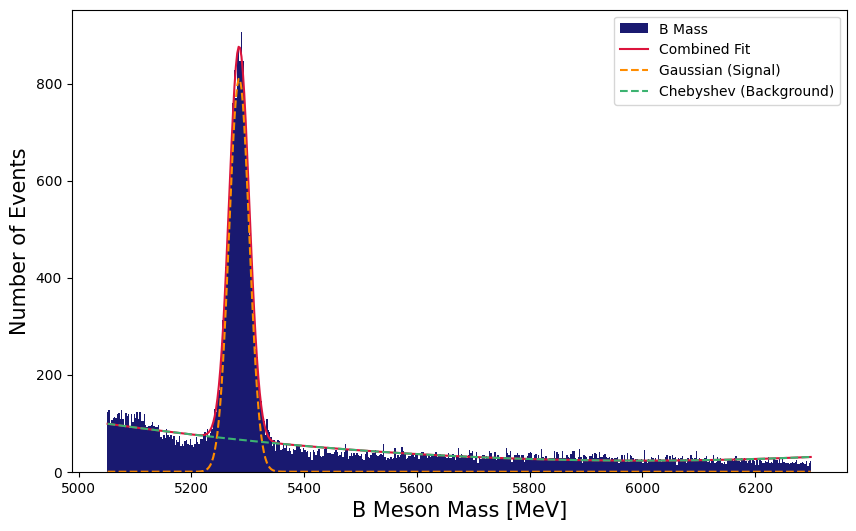

In [52]:
#define a Chebychev polynomial (background)
def chebychev(x, a0, a1, a2): #a0, a1, a2 are the coefficients
    T0 = 1 #first Chebychev polynomial
    T1 = x #second Chebychev polynomial
    T2 = 2 * x**2 - 1 #third Chebychev polynomial
    return a0 * T0 + a1 * T1 + a2 * T2 #return linear combination Chebychev polynomial

#combined model
def combined_model(x, A, mu, sigma, a0, a1, a2): 
    return gauss(x, A, mu, sigma) + chebychev(x, a0, a1, a2) #return the combined model

#initial guesses
p0 = [np.max(bin_height), np.mean(Cut_M_Mass), np.std(Cut_M_Mass), 1, 0, 0] #initial parameters, a1 and a2 are initially set to 0 (simplest model)

#fit combined model to data
popt_comb, pcov_comb = curve_fit(combined_model, bin_centers, bin_height, p0=p0)

#extract fitted parameters
A_fit, mu_fit, sigma_fit, a0_fit, a1_fit, a2_fit = popt_comb

#Get the fitted curves
y_combined = combined_model(bin_centers, *popt_comb)
y_gauss = gauss(bin_centers, A_fit, mu_fit, sigma_fit)
y_chebychev = chebychev(bin_centers, a0_fit, a1_fit, a2_fit)

#Plot data and fits
plt.figure(figsize=(10, 6))
plt.hist(Cut_M_Mass, bins=500, range=(np.min(Cut_M_Mass), np.max(Cut_M_Mass)), label="B Mass", color="midnightblue")
plt.plot(bin_centers, y_combined, label="Combined Fit", color="crimson")
plt.plot(bin_centers, y_gauss, label="Gaussian (Signal)", linestyle="--", color="darkorange")
plt.plot(bin_centers, y_chebychev, label="Chebyshev (Background)", linestyle="--", color="mediumseagreen")
plt.xlabel("B Meson Mass [MeV]", fontsize=15)
plt.ylabel("Number of Events", fontsize=15)
plt.legend()
plt.show()

<font color = "navy"> At first glance, this seems like a reasonable fit, lets double check again:

In [53]:
#yields
N_signal = A_fit * sigma_fit * np.sqrt(2 * np.pi) #area under gauss curve

x_min = np.min(bin_centers)
x_max = np.max(bin_centers)
#Chebyshev integral
def integrate_chebychev(a0, a1, a2, x_min, x_max): #integral of Chebyshev polynomial
    T0_int = a0 * (x_max - x_min) #integral of T0
    T1_int = a1 * (x_max**2 / 2 - x_min**2 / 2) #integral of T1
    T2_int = a2 * (2 * x_max**3 / 3 - 2 * x_min**3 / 3 - (x_max - x_min)) #integral of T2
    return T0_int + T1_int + T2_int #return the sum of the integrals

N_background = integrate_chebychev(a0_fit, a1_fit, a2_fit, x_min, x_max) #area under Chebyshev polynomial

#extracting the parameter uncertainties from the covariance matrix
param_errors = np.sqrt(np.diag(pcov_comb))  #covariance matrix is diagonalized to get individual parameter errors
A_err, mu_err, sigma_err, a0_err, a1_err, a2_err = param_errors

#propagate uncertainties to get the error on the signal and background yields
N_signal_err = N_signal * np.sqrt((A_err / A_fit)**2 + (sigma_err / sigma_fit)**2)
#approximate background error by considering individual uncertainties in Chebyshev parameters
N_background_err = np.sqrt(
    (integrate_chebychev(a0_err, a1_fit, a2_fit, x_min, x_max))**2 +  #a0 error
    (integrate_chebychev(a0_fit, a1_err, a2_fit, x_min, x_max))**2 +  #a1 error
    (integrate_chebychev(a0_fit, a1_fit, a2_err, x_min, x_max))**2    #a2 error
)

print(f"Signal Yield: {N_signal:.2f} ± {N_signal_err:.2f} events")  #print the signal yield
print(f"Background Yield: {N_background:.2f} ± {N_background_err:.2f} events")  #print the background yield

#Chi-Squared Calculation: measure of the goodness of fit
chi2 = np.sum(((bin_height - y_combined) ** 2) / bin_height) #chi-squared calculation
print(f"Chi-Square: {chi2:.2f}") #print the chi-squared
dof = len(bin_height) - len(popt_comb) #degrees of freedom: data points - fit parameters
chi2_red = chi2 / dof #reduced chi-squared: chi-squared / degrees of freedom
print(f"Reduced Chi-Square: {chi2_red:.2f}") #print the reduced chi-squared


Signal Yield: 36379.85 ± 277.21 events
Background Yield: 53288.66 ± 8966140.24 events
Chi-Square: 1246.97
Reduced Chi-Square: 2.52


<font color = "navy"> Looking at the returns, the reduced chi-squared is slightly better, but not considerably so. This may be because this combination was not the right choice to fit the data either, or because the data is simply too messy to be fitted with very simple models. 

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [54]:
#convert to np arrays
H1_Charge = np.array(CutTree['H1_Charge'])
H2_Charge = np.array(CutTree['H2_Charge'])
H3_Charge = np.array(CutTree['H3_Charge'])

#total charge
Total_Charge = H1_Charge + H2_Charge + H3_Charge

#mask for B+ and B-
B_plus_mask = (Total_Charge == 1)
B_minus_mask = (Total_Charge == -1)

#masses using the masks
B_plus_mass = np.array(Cut_M_Mass[B_plus_mask])
B_minus_mass = np.array(Cut_M_Mass[B_minus_mask])

#B+ histogram and fit
bin_heights_plus, bin_edges_plus = np.histogram(B_plus_mass, bins=200, range=(np.min(Cut_M_Mass), np.max(Cut_M_Mass)))
bin_centers_plus = (bin_edges_plus[:-1] + bin_edges_plus[1:]) / 2
p0_plus = [np.max(bin_heights_plus), np.mean(B_plus_mass), np.std(B_plus_mass)]
popt_Bplus, _ = curve_fit(gauss, bin_centers_plus, bin_heights_plus, p0=p0_plus)
N_Bplus = popt_Bplus[0]

#B- histogram and fit
bin_heights_minus, bin_edges_minus = np.histogram(B_minus_mass, bins=200, range=(np.min(Cut_M_Mass), np.max(Cut_M_Mass)))
bin_centers_minus = (bin_edges_minus[:-1] + bin_edges_minus[1:]) / 2
p0_minus = [np.max(bin_heights_minus), np.mean(B_minus_mass), np.std(B_minus_mass)]
popt_Bminus, _ = curve_fit(gauss, bin_centers_minus, bin_heights_minus, p0=p0_minus)
N_Bminus = popt_Bminus[0]

A = (N_Bminus - N_Bplus) / (N_Bminus + N_Bplus) #asymmetry using formula above
sigma_A = np.sqrt((1 - A**2) / (N_Bminus + N_Bplus)) #uncertainty

# Output results
print(f"Asymmetry (A): {A:.4f}")
print(f"Uncertainty (σ_A): {sigma_A:.4f}")


Asymmetry (A): -0.0540
Uncertainty (σ_A): 0.0217


/var/folders/yt/h1dq9sz93x91nnzf7tr_jnmh0000gn/T/ipykernel_51669/410858471.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  H1_Charge = np.array(CutTree['H1_Charge'])
/var/folders/yt/h1dq9sz93x91nnzf7tr_jnmh0000gn/T/ipykernel_51669/410858471.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  H2_Charge = np.array(CutTree['H2_Charge'])
/var/folders/yt/h1dq9sz93x91nnzf7tr_jnmh0000gn/T/ipykernel_51669/410858471.py:4: DeprecationWarning: __array__ implementation doesn't acce

<font color = "navy"> The value found for assymmetry of -0.0540 would suggest B+ mesons are more abundant than B- mesons. This does seem to line up with other conclusions of the LHCb experiment: https://home.cern/news/news/physics/largest-matter-antimatter-asymmetry-observed. However, the size of the value seems suspiciously high, and probably unrealistic. The error similarly is not large enough to account for the size of the assymmetry. This value could be due to different things, like for example the earlier selection not being strict enough, or errors in the analysis of the data. It can also be due to physical assymmetries in the equipment, but we can rule out this last one:

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

<font color = 'navy'> During the crosscheck, the following value was found for the assymmetry:
![Screenshot assymmetry value -0.0536](images/Screenshot%202025-02-23%20at%2019.44.17.png)

This is not considerably different from the 'MagnetDown', so we can rule out detector affect causing the large assymmetry.


## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)